In [1]:
#import needed libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from pycaret.regression import *

## Load Ward Data
Use same code for 1, 3, and 5 year return values

In [2]:
#load file with investment return for wards (included ward returns), use for 1, 3, 5 years

#use for 1 year
df = pd.read_excel('one_year_features.xlsx', index_col=0)

#use for 3 year
#df = pd.read_excel('three_year_features.xlsx', index_col=0)

#use for 5 year
#df = pd.read_excel('five_year_features.xlsx', index_col=0)

In [3]:
#check columns
df.columns

Index(['1y_ret', '1y_ret_ward', 'Price', 'Year', 'Type', 'Ward',
       'Number of Parks', 'Number of Primary Schools',
       'Primary School AVG Rating', 'Number of Secondary Schools',
       'Secondary School AVG Rating', 'Number of Post 16 Schools',
       'Post 16 School AVG Rating', 'Number of Healthcare Services',
       'Number of Dentistries', 'Number of High Severity Crimes Previous Year',
       'Number of Low Severity Crimes Previous Year'],
      dtype='object')

In [4]:
#drop unused columns, may investigate raw return and price 

#use for 1 year
df = df.drop(['1y_ret', 'Ward', 'Year', 'Price'], axis=1)

#use for 3 year
#df = df.drop(['3y_ret', 'Ward', 'Year', Price'], axis=1)

#use for 5 year
#df = df.drop(['5y_ret', 'Ward', 'Year', 'Price'], axis=1)

## Prepare Data for Models

In [5]:
#one hot encode home type
one_hot = pd.get_dummies(df['Type'])
df = df.drop('Type',axis = 1)
df = df.join(one_hot) 

In [6]:
#set X and y

#use for 1 year
X = df.drop(['1y_ret_ward'], axis=1)
y = df['1y_ret_ward']

#use for 3 year
#X = df.drop(['3y_ret_ward'], axis=1)
#y = df['3y_ret_ward']

#use for 5 year
#X = df.drop(['5y_ret_ward'], axis=1)
#y = df['5y_ret_ward']

In [7]:
#split the data (default test size is 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
#confirm sizes
print(X_train.shape, X_test.shape)

(528, 15) (176, 15)


In [9]:
#pip install xgboost

## XGBRegressor

In [10]:
#create XBGRegressor model and fit data
model = XGBRegressor()
model.fit(X_train, y_train);

In [11]:
#create predictions
y_pred = model.predict(X_test)

In [12]:
#check MSE values
mse_val = mean_squared_error(y_test, y_pred)
mse_val

0.07803581397408721

In [13]:
#check MAE values
mae_val = mean_absolute_error(y_test, y_pred)
mae_val

0.16918672122814782

In [14]:
#explore feature importance
for col,score in zip(X_train.columns,model.feature_importances_):
    print(col,score)

Number of Parks 0.02493378
Number of Primary Schools 0.06577208
Primary School AVG Rating 0.030366847
Number of Secondary Schools 0.1855326
Secondary School AVG Rating 0.028699027
Number of Post 16 Schools 0.031709243
Post 16 School AVG Rating 0.02753231
Number of Healthcare Services 0.043743055
Number of Dentistries 0.031359766
Number of High Severity Crimes Previous Year 0.1020069
Number of Low Severity Crimes Previous Year 0.048696492
D 0.07493894
F 0.22611603
S 0.032927614
T 0.045665227


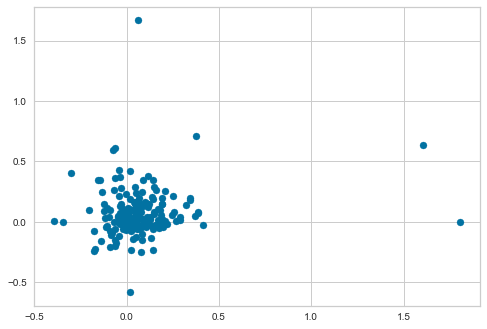

In [15]:
#plot predicted values vs. true value
plt.scatter(y_pred, y_test)

## Dummy Regressor

In [16]:
#set up and predicte values using dummy regressor and means
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_pred_dummy = dummy_regr.predict(X_test)

In [17]:
#check MSE values
mse_val = mean_squared_error(y_test, y_pred_dummy)
mse_val

0.0429236358645622

In [18]:
#check MAE values
mae_val = mean_absolute_error(y_test, y_pred_dummy)
mae_val

0.12695337975398086

## MLPRegressor

In [19]:
#set up MLP regression model, fit data, and predict values
mlp_reg = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
y_pred  = mlp_reg.predict(X_test)

In [20]:
#check MSE values
mse_val = mean_squared_error(y_test, y_pred)
mse_val

0.08788798720350242

In [21]:
#check MAE values
mae_val = mean_absolute_error(y_test, y_pred)
mae_val

0.2088249924931773

## PyCaret

In [22]:
#pip install pycaret

In [23]:
#review columns
df.columns

Index(['1y_ret_ward', 'Number of Parks', 'Number of Primary Schools',
       'Primary School AVG Rating', 'Number of Secondary Schools',
       'Secondary School AVG Rating', 'Number of Post 16 Schools',
       'Post 16 School AVG Rating', 'Number of Healthcare Services',
       'Number of Dentistries', 'Number of High Severity Crimes Previous Year',
       'Number of Low Severity Crimes Previous Year', 'D', 'F', 'S', 'T'],
      dtype='object')

In [24]:
#set up pycaret, set values to be numeric
num_feats = ['Number of Parks', 'Number of Primary Schools',
       'Primary School AVG Rating', 'Number of Secondary Schools',
       'Secondary School AVG Rating', 'Number of Post 16 Schools',
       'Post 16 School AVG Rating', 'Number of Healthcare Services',
       'Number of Dentistries', 'Number of High Severity Crimes Previous Year',
       'Number of Low Severity Crimes Previous Year','D', 'F', 'S', 'T']

reg = setup(data = df, target = '1y_ret_ward', session_id=123, numeric_features=num_feats) 

,Description,Value
0,session_id,123
1,Target,1y_ret_ward
2,Original Data,"(704, 16)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(492, 15)"


In [25]:
#compare models using pycaret
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,0.1189,0.0409,0.1954,-0.0079,0.1243,16.5689,0.0170
dummy,Dummy Regressor,0.1189,0.0409,0.1954,-0.0079,0.1243,16.5689,0.0140
lasso,Lasso Regression,0.1190,0.0410,0.1955,-0.0093,0.1244,16.5678,0.0140
en,Elastic Net,0.1190,0.0410,0.1957,-0.0112,0.1245,16.5657,0.0120
omp,Orthogonal Matching Pursuit,0.1201,0.0409,0.1956,-0.0152,0.1217,10.8548,0.0150
br,Bayesian Ridge,0.1193,0.0412,0.1962,-0.0170,0.1243,15.2887,0.0170
huber,Huber Regressor,0.1202,0.0422,0.1988,-0.0485,0.1358,13.1720,0.0380
ridge,Ridge Regression,0.1239,0.0424,0.2001,-0.0723,0.1255,10.8808,0.0150
lr,Linear Regression,0.1240,0.0425,0.2002,-0.0737,0.1256,10.8840,0.4610
lar,Least Angle Regression,0.1252,0.0427,0.2010,-0.0854,0.1263,10.9799,0.0180


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=123, verbose=False)

In [26]:
#create and tune lasso model using pycaret
mod = create_model('llar')
tuned_mod = tune_model(mod)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1128,0.0255,0.1597,-0.0408,0.1008,149.3967
1,0.0965,0.0153,0.1238,-0.0012,0.0850,1.5043
2,0.1327,0.0778,0.2790,-0.0090,0.1621,2.2151
3,0.1221,0.0229,0.1513,-0.0012,0.1046,2.0029
4,0.1210,0.0251,0.1584,-0.0119,0.1050,1.9337
5,0.1159,0.0283,0.1683,-0.0050,0.1195,1.6588
6,0.1336,0.0712,0.2668,-0.0010,0.1567,2.5699
7,0.1259,0.0680,0.2607,-0.0007,0.1521,1.5436
8,0.1212,0.0450,0.2122,-0.0071,0.1358,1.4470


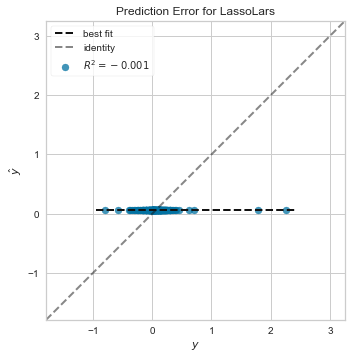

In [27]:
#plot model error using pycaret
plot_model(tuned_mod, plot = 'error')